# Zoo Animal Clasification

The Zoo dataset (https://www.kaggle.com/uciml/zoo-animal-classification)

This dataset consists of 101 animals from a zoo.

There are 16 features or attributes with various traits to describe the animals: animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, tail, domestic, catsize.

The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read from the dataset
df = pd.read_csv('../DATA/zoo.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.shape

(101, 18)

In [5]:
# Extract the column and save for later.
df['animal_name'].tolist()
animal_names =df['animal_name'].tolist()

In [6]:
# Drop the first column, the animal names as it not required feature
df=df.drop('animal_name',axis=1)

In [7]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
#Using sklearn for model import and split of data into training and test sets
from sklearn.model_selection import train_test_split

# copy all columns excluding last column which is our prediction value
X = df.loc[:, df.columns != 'class_type']

# copy the last column only
Y = df['class_type']

#setting up the test_size as 30%, i.e 0.3, so training data will have 70% data and rest of the data in put in test data
# Random state to have a same result across the model creation/build
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size= 0.3, random_state=42)

In [9]:
# Creating and building the Machine Learning Model

#Using Decision tree classifier model for creating the model

from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier()

In [10]:
model

DecisionTreeClassifier()

In [11]:
# Train the model using the training data 

model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [12]:
# Predict the values for testing set

Y_predict = model.predict(X_test)

In [13]:
# Visualizing the results

df.columns.values
list(df.columns.values)

# extract the feature names
feature_names = list(df.columns.values)

# drop the last column name
feature_names = feature_names[:-1]

In [14]:
# extact the class names
class_int = df['class_type'].unique().tolist()
print(class_int)

[1, 4, 2, 7, 6, 5, 3]


In [15]:
#This comes the class.csv file part of the Zoo Classification dataset
class_names = ['Mammal', 'Fish', 'Bird', 'Invertebrate', 'Bug', 'Amphibian', 'Reptile']

In [16]:
# map the class names to the class number as specified in the dataset

dictionary = dict(zip(class_names, class_int))

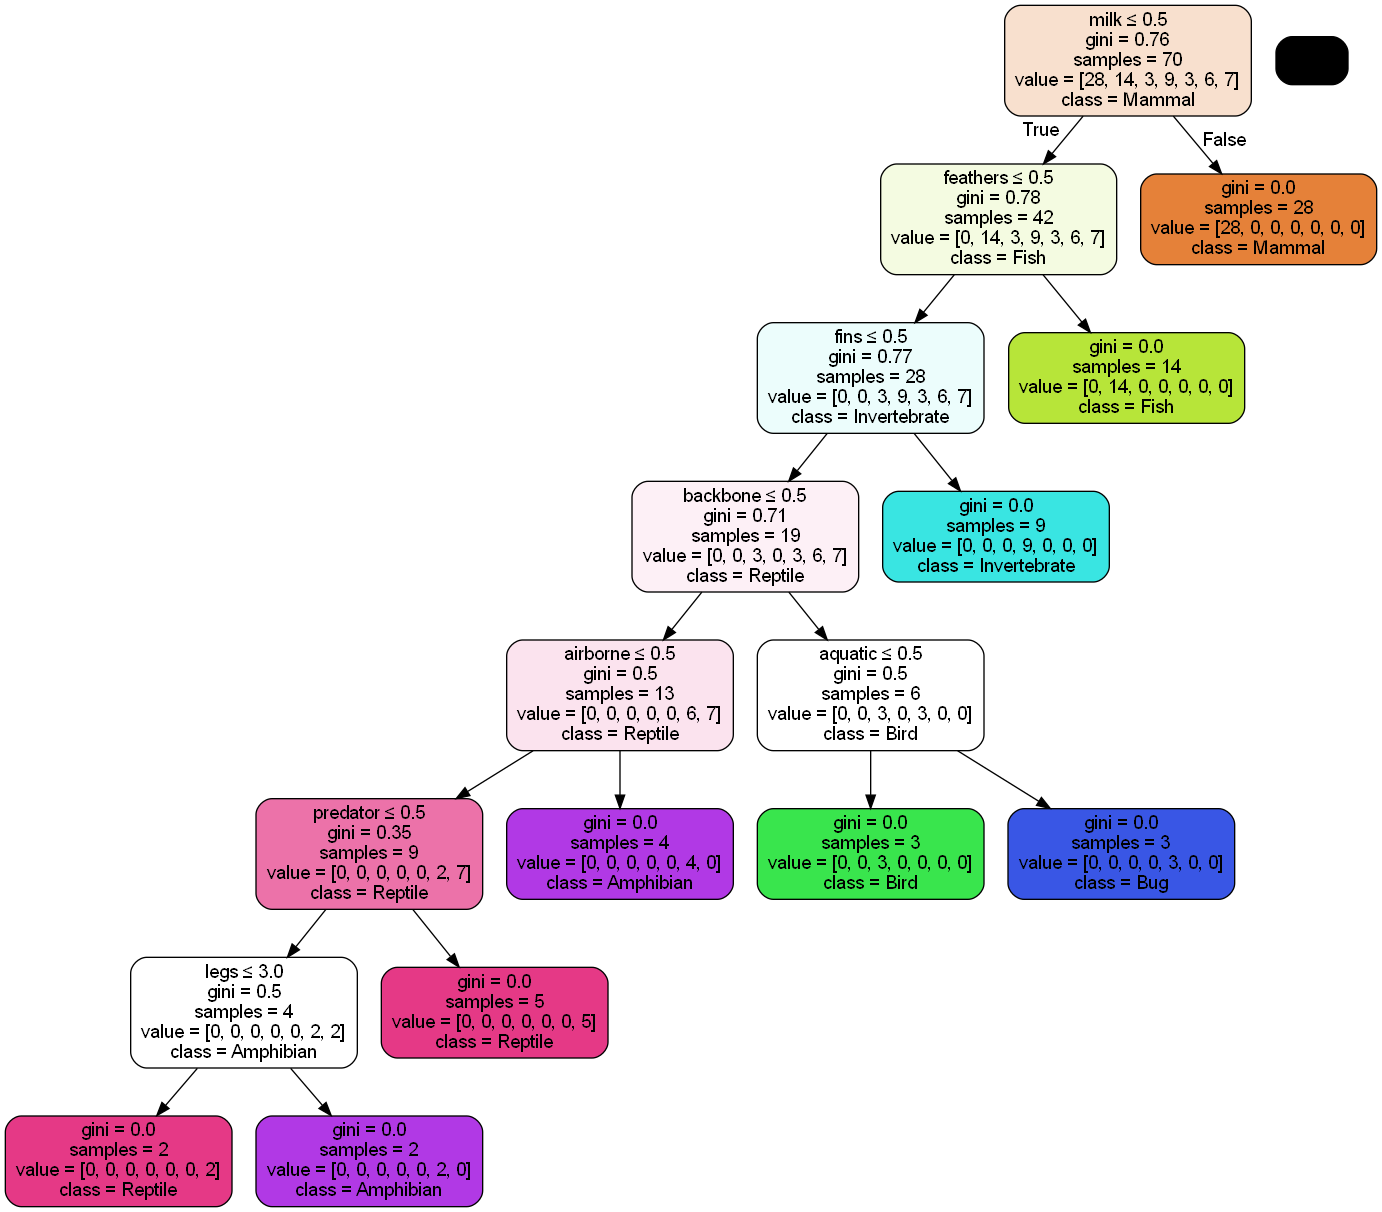

In [22]:
#install the required libraries if it says no module name error 
import os
os.environ["PATH"] += os.pathsep + 'D:\\anaconda3\\Library\\bin\\graphviz'
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus 

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                feature_names = feature_names,
                class_names = class_names,
                proportion = False, precision = 2,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [23]:
#Measuring the performance of the model

# Accuracy of the machine learning model

from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, Y_predict)
print(acc * 100 , "%")

96.7741935483871 %


In [24]:
# Build the confusion matrix
# Confusion matrix is build from the actual test_targets to the predicted test_predict.

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(Y_test, Y_predict)
print('Confusion Matrix :')
print(conf_matrix)

Confusion Matrix :
[[13  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  1  0  1  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  3]]
